In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px 


In [105]:
Data = pd.read_csv("Final_Data9.csv")
Data=Data.drop(["Unnamed: 0"],axis=1)
Data

,timestamp,Open,High,Low,Close,Adj Close,Volume,count,mean,var
0,2016-03-12,421.605011,421.795013,410.093994,411.623993,411.623993,92712896,200,0.580000,0.315176
1,2016-03-13,411.648010,416.604004,411.641998,414.065002,414.065002,74322800,200,0.455000,0.339673
2,2016-03-14,414.200989,416.683990,414.200989,416.437988,416.437988,95259400,200,0.360000,0.352161
3,2016-03-15,416.388000,418.131012,414.984985,416.829987,416.829987,66781700,200,0.375000,0.285804
4,2016-03-16,416.888000,417.686005,415.911987,417.010986,417.010986,65185800,200,0.350000,0.278894
...,...,...,...,...,...,...,...,...,...,...
1272,2019-09-05,10588.183594,10627.269531,10516.417969,10575.533203,10575.533203,14551239508,200,0.350000,0.469849
1273,2019-09-06,10578.198242,10898.761719,10292.299805,10353.302734,10353.302734,19536574783,69,0.724638,0.349531
1274,2019-09-07,10353.931641,10558.673828,10348.918945,10517.254883,10517.254883,15307366476,21,0.666667,0.433333
1275,2019-09-08,10518.114258,10595.637695,10409.090820,10441.276367,10441.276367,13670567493,13,1.000000,0.000000


In [3]:
Validate_Data = pd.read_csv("Twittes_Withted_Score_test2.csv")
Validate_Data=Validate_Data.drop(["Unnamed: 0"],axis=1)
Validate_Data

,timestamp,Sentiment_Score_-1,Sentiment_Score_0,Sentiment_Score_1,Close,Volume
0,2022-07-21,0.207368,0.393318,0.399314,23164.63,33631012204


In [4]:
# plot Prices
# Initilaize list 

X = list(Data.loc[:,"timestamp"])
Y = list(Data.loc[:,"Close"])


plot = px.line(x=X, y=Y)

plt.tight_layout()

plot.show()

<Figure size 432x288 with 0 Axes>

In [5]:
Data['timestamp'] = pd.to_datetime(Data['timestamp']).dt.date
Validate_Data['timestamp'] = pd.to_datetime(Validate_Data['timestamp']).dt.date


In [6]:
Data.set_index("timestamp",inplace=True)
Data

,Open,High,Low,Close,Adj Close,Volume,count,mean,var
timestamp,,,,,,,,,
2016-03-12,421.605011,421.795013,410.093994,411.623993,411.623993,92712896,200,0.580000,0.315176
2016-03-13,411.648010,416.604004,411.641998,414.065002,414.065002,74322800,200,0.455000,0.339673
2016-03-14,414.200989,416.683990,414.200989,416.437988,416.437988,95259400,200,0.360000,0.352161
2016-03-15,416.388000,418.131012,414.984985,416.829987,416.829987,66781700,200,0.375000,0.285804
2016-03-16,416.888000,417.686005,415.911987,417.010986,417.010986,65185800,200,0.350000,0.278894
...,...,...,...,...,...,...,...,...,...
2019-09-05,10588.183594,10627.269531,10516.417969,10575.533203,10575.533203,14551239508,200,0.350000,0.469849
2019-09-06,10578.198242,10898.761719,10292.299805,10353.302734,10353.302734,19536574783,69,0.724638,0.349531
2019-09-07,10353.931641,10558.673828,10348.918945,10517.254883,10517.254883,15307366476,21,0.666667,0.433333


In [132]:
Data.loc[:,["Close","Volume" , "count",	"mean"]]

,Close,Volume,count,mean
0,411.623993,92712896,200,0.580000
1,414.065002,74322800,200,0.455000
2,416.437988,95259400,200,0.360000
3,416.829987,66781700,200,0.375000
4,417.010986,65185800,200,0.350000
...,...,...,...,...
1272,10575.533203,14551239508,200,0.350000
1273,10353.302734,19536574783,69,0.724638
1274,10517.254883,15307366476,21,0.666667
1275,10441.276367,13670567493,13,1.000000


In [130]:
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(Data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
Data.corr()[mask] = np.nan
(Data.corr()
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Users\mm\AppData\Local\Temp/ipykernel_10032/1787757924.py:5: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Open,High,Low,Close,Adj Close,Volume,count,mean
Open,1.00,1.00,1.00,1.00,1.00,0.73,0.15,0.50
High,1.00,1.00,1.00,1.00,1.00,0.73,0.15,0.50
Low,1.00,1.00,1.00,1.00,1.00,0.73,0.15,0.51
Close,1.00,1.00,1.00,1.00,1.00,0.73,0.15,0.50
Adj Close,1.00,1.00,1.00,1.00,1.00,0.73,0.15,0.50
Volume,0.73,0.73,0.73,0.73,0.73,1.00,0.09,0.56
count,0.15,0.15,0.15,0.15,0.15,0.09,1.00,-0.06
mean,0.50,0.50,0.51,0.50,0.50,0.56,-0.06,1.00


In [104]:
Data.unique

AttributeError: 'DataFrame' object has no attribute 'unique'

In [7]:
Validate_Data.set_index("timestamp",inplace=True)
Validate_Data

,Sentiment_Score_-1,Sentiment_Score_0,Sentiment_Score_1,Close,Volume
timestamp,,,,,
2022-07-21,0.207368,0.393318,0.399314,23164.63,33631012204


# split Dataset

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
def Split(X,y):
     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,shuffle=False, random_state=42)
     return   X_train, X_test, y_train, y_test

In [10]:
def plot_pred_train_test(trainPredict ,testPredict,dataset =Data[["Close"]].values
                        , title = "Model eval",xLabel ="X",yLabel = "Y"):
    look_back=1
    dataset = Data[["Close"]].values#np.concatenate(( X[:,-1], y[-1:]), axis=0)
    trainPredictPlot = np.empty((len(dataset)))
    trainPredictPlot[:] = np.nan
    
    trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
    # shift test predictions for plotting
    testPredictPlot = np.empty((len(dataset)))
    testPredictPlot[:] = np.nan
    
    testPredictPlot[len(trainPredict)+look_back:] = testPredict
    
    # plot baseline and predictions
    fig = plt.figure()
    
    fig.set_figheight(8)
    fig.set_figwidth(10)

    plt.plot(Data.index,dataset[:,0], label = "actual")
    plt.plot(Data.index,trainPredictPlot, label = "train prediction")
    plt.plot(Data.index,testPredictPlot, label = "test prediction")
    plt.title(title)
    plt.ylabel(yLabel)
    plt.xlabel(xLabel)
    plt.legend()
    plt.show()


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [12]:

# X = Data.loc[:,[ "Close","Volume", "Sentiment_Score_-1" ,"Sentiment_Score_0" ,"Sentiment_Score_1"]]
X = Data.loc[:,["Close","Volume" ,"mean" ,"count"]]
# X = Data.loc[:,[ "Close","Volume", "Sentiment_Score" ,"neg",	"neu",	"pos"]]
#X = Data.loc[:,[ "Open",	"High",	"Low",	"Close",	"Adj Close",	"Volume"]]
y=  Data.loc[:,"Close"].shift(-1)
X_train, X_test, y_train, y_test   = Split(X[:-1],y[:-1])

In [13]:
# from sklearn import preprocessing
# mm_scaler = preprocessing.MinMaxScaler()
# X_train = mm_scaler.fit_transform(X_train)
# X_test= mm_scaler.transform(X_test)

# LR

## Train on just Bitcoin History Data

In [133]:
reg = LinearRegression().fit(X_train.loc[:,[ "Close","Volume"]], y_train)
predict = reg.predict(X_test.loc[:,[ "Close","Volume"]])
predict_Train = reg.predict(X_train.loc[:,[ "Close","Volume"]])

In [134]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")

print("----------------")
print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))

print("----------------")
print("----------------")
print("Final Test")

# predict_FinalTest = reg.predict(Validate_Data.loc[:,[ "Close","Volume"]])
# print(predict_FinalTest)


mean_squared_error Test : 134353.6287786452
mean_absolute_error Test : 235.32610123791886
----------------
mean_squared_error Train : 110758.39215195792
mean_absolute_error Train : 153.20113026622298
----------------
Root_mean_squared_error Train : 332.8038343408289
Root_mean_absolute_error Test : 366.54280620228405
----------------
Train R2 score: 0.992994718097563
Test R2 score: 0.98522017536067
----------------
----------------
Final Test


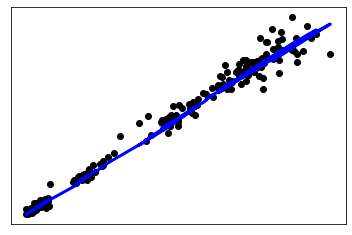

In [143]:
# Plot outputs
plt.scatter(X_test["Close"].values, y_test, color="black")
plt.plot(X_test["Close"].values, predict, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

array([ 3654.833496,  3923.918701,  3820.408691,  3865.952637,
        3742.700439,  3843.52002 ,  3943.409424,  3836.741211,
        3857.717529,  3845.19458 ,  4076.632568,  4025.248291,
        4030.8479  ,  4035.296387,  3678.924561,  3687.365479,
        3661.301025,  3552.953125,  3706.052246,  3630.675293,
        3655.006836,  3678.563965,  3657.839355,  3728.568359,
        3601.013672,  3576.032471,  3604.577148,  3585.123047,
        3600.865479,  3599.765869,  3602.460449,  3583.96582 ,
        3470.450439,  3448.116943,  3486.181641,  3457.792725,
        3487.945313,  3521.060791,  3464.013428,  3459.154053,
        3466.357422,  3413.767822,  3399.47168 ,  3666.780273,
        3671.203613,  3690.188232,  3648.430664,  3653.528564,
        3632.070557,  3616.880859,  3620.810791,  3629.787598,
        3673.836182,  3915.714355,  3947.094482,  3999.820557,
        3954.118164,  4005.526611,  4142.526855,  3810.42749 ,
        3882.696289,  3854.35791 ,  3851.047363,  3854.

In [16]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":y_test , "predict":predict })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

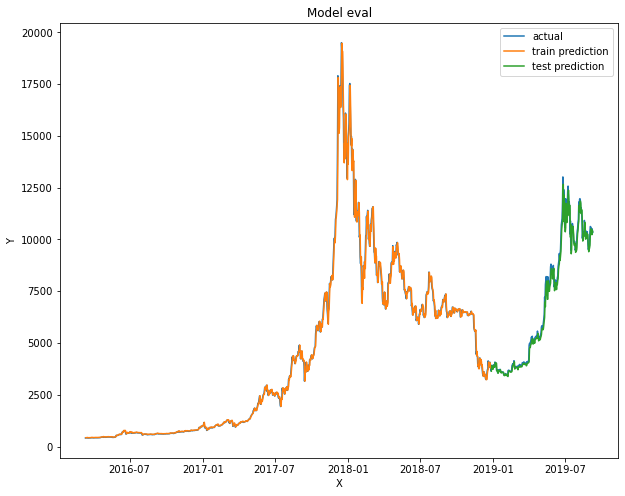

In [17]:
plot_pred_train_test(predict_Train,predict)

## Train on just Sentiment analysis Data

In [18]:
reg = LinearRegression().fit(X_train.loc[:,[  "mean" ,"count"]], y_train)
predict = reg.predict(X_test.loc[:,[  "mean" ,"count"]])
predict_Train = reg.predict(X_train.loc[:,[  "mean" ,"count"]])

In [19]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")

print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))



mean_squared_error Test : 6910628.152381921
mean_absolute_error Test : 2042.3727132848512
----------------
mean_squared_error Train : 12434670.894887574
mean_absolute_error Train : 2658.782588552535
----------------
Root_mean_squared_error Train : 3526.2828722165177
Root_mean_absolute_error Test : 2628.8073631177162
----------------
Train R2 score: 0.21352799286572177
Test R2 score: 0.2397833004711799


In [20]:
# Validate 



In [21]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":y_test , "predict":predict })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

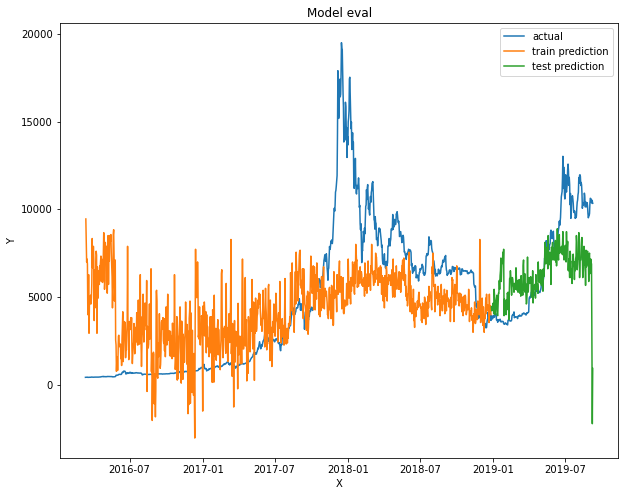

In [22]:
plot_pred_train_test(predict_Train,predict)

## Train on the both Sentiment analysis Data and Bitcoin

In [23]:
reg = LinearRegression().fit(X_train, y_train)
predict = reg.predict(X_test)
predict_Train = reg.predict(X_train)

In [26]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")
print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))

print("----------------")
print("Final Test")
print("----------------")

# predict_FinalTest = reg.predict(Validate_Data.loc[:,[ "Close","Volume", "Sentiment_Score_-1" ,"Sentiment_Score_0" ,"Sentiment_Score_1"]])
# print(predict_FinalTest)

# mean_squared_error Test : 71074.07483876638
# mean_absolute_error Test : 171.86702685322024
# ----------------
# mean_squared_error Train : 95214.60999436714
# mean_absolute_error Train : 181.64027117823343
# ----------------
# Root_mean_squared_error Train : 308.5686471344215
# Root_mean_absolute_error Test : 266.59721461179294
# ----------------
# Train R2 score: 0.9873692211575351
# Test R2 score: 0.9168572406885547
# ----------------
# Final Test
# ----------------

mean_squared_error Test : 135241.35067880352
mean_absolute_error Test : 236.6901512096266
----------------
mean_squared_error Train : 110741.34490921762
mean_absolute_error Train : 152.9743043020867
----------------
Root_mean_squared_error Train : 332.77822180728356
Root_mean_absolute_error Test : 367.751751428601
----------------
Train R2 score: 0.9929957963069767
Test R2 score: 0.985122519836721
----------------
Final Test
----------------


In [25]:
u = predict -  y_test
u.max()

1474.5328123492618

In [27]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":y_test , "predict":predict })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

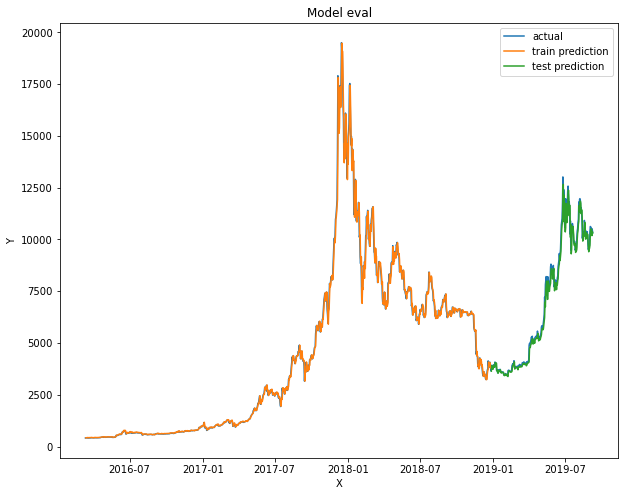

In [28]:
plot_pred_train_test(predict_Train,predict)

# RF

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


## Train on just Bitcoin History Data

### Tuning Tree

In [30]:
# Source Code https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

n_estimators_Tu = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features_Tu = ['auto', 'sqrt']
max_depth_Tu = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth_Tu.append(None)
min_samples_split_Tu = [2, 5, 10]
min_samples_leaf_Tu = [1, 2, 4]
bootstrap_Tu = [True, False]
random_grid = {'n_estimators': n_estimators_Tu,
               'max_features': max_features_Tu,
               'max_depth': max_depth_Tu,
               'min_samples_split': min_samples_split_Tu,
               'min_samples_leaf': min_samples_leaf_Tu,
               'bootstrap': bootstrap_Tu}

In [31]:
rf = RandomForestRegressor( random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train.loc[:,["Close","Volume"]], y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\mm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': False}

In [32]:
n_estimators = rf_random.best_params_["n_estimators"]
min_samples_split = rf_random.best_params_["min_samples_split"]
max_features = rf_random.best_params_["max_features"]
max_depth = rf_random.best_params_["max_depth"]
bootstrap = rf_random.best_params_["bootstrap"]

In [33]:
rf = RandomForestRegressor(n_estimators = n_estimators ,
                           min_samples_split = min_samples_split , 
                           max_features= max_features,
                           max_depth=max_depth ,
                           bootstrap=bootstrap ,
                           random_state=42)

rf= rf.fit(X_train.loc[:,["Close","Volume"]], y_train)
predict = rf.predict(X_test.loc[:,["Close","Volume"]])
predict_Train = rf.predict(X_train.loc[:,["Close","Volume"]])

c:\Users\mm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



In [34]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_squared_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")
print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))

print("----------------")
print("----------------")
print("-------- Final Test --------")

predict_FinalTest = rf.predict(Validate_Data.loc[:,[ "Close","Volume"]])
print(predict_FinalTest)


mean_squared_error Test : 237984.0775509547
mean_absolute_error Test : 353.93744434295957
----------------
mean_squared_error Train : 18011.70438980858
mean_absolute_error Train : 53.38113493938001
----------------
Root_mean_squared_error Train : 134.20769124684537
Root_mean_squared_error Test : 487.83611751381704
----------------
Train R2 score: 0.9988607900101976
Test R2 score: 0.9738201121537933
----------------
----------------
-------- Final Test --------
[17776.699219]


In [35]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":y_test , "predict":predict })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

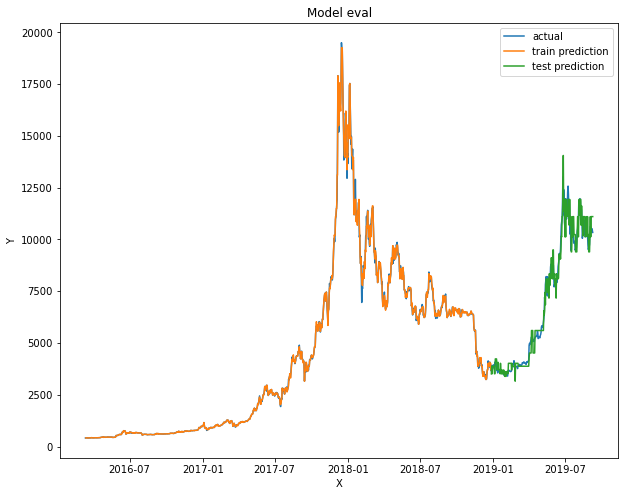

In [36]:
plot_pred_train_test(predict_Train,predict)

## Train on just Sentiment analysis Data

### Tuning Tree

In [38]:
rf = RandomForestRegressor( random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train.loc[:,[ "mean" ,"count"]], y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [39]:
n_estimators = rf_random.best_params_["n_estimators"]
min_samples_split = rf_random.best_params_["min_samples_split"]
max_features = rf_random.best_params_["max_features"]
max_depth = rf_random.best_params_["max_depth"]
bootstrap = rf_random.best_params_["bootstrap"]

In [40]:
rf = RandomForestRegressor(n_estimators = n_estimators ,
                           min_samples_split = min_samples_split , 
                           max_features= max_features,
                           max_depth=max_depth ,
                           bootstrap=bootstrap ,
                           random_state=42)

rf= rf.fit(X_train.loc[:,[ "mean" ,"count"]], y_train)
predict = rf.predict(X_test.loc[:,[ "mean" ,"count"]])
predict_Train = rf.predict(X_train.loc[:,[ "mean" ,"count"]])

In [41]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")
print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))

mean_squared_error Test : 22703892.294644218
mean_absolute_error Test : 3939.4915657256975
----------------
mean_squared_error Train : 8676174.642083291
mean_absolute_error Train : 1968.269812472436
----------------
Root_mean_squared_error Train : 2945.5346954472107
Root_mean_absolute_error Test : 4764.8601547835815
----------------
Train R2 score: 0.45124655548284465
Test R2 score: -1.4975845445747487


In [42]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":y_test , "predict":predict })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

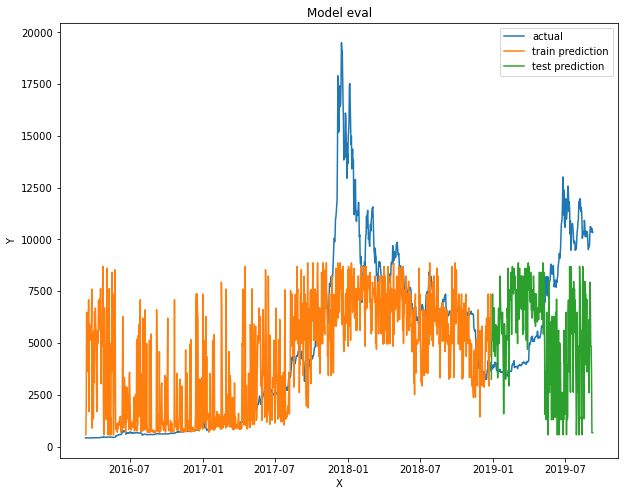

In [43]:
plot_pred_train_test(predict_Train,predict)

## Train on the both bitcoin and Sentiment analysis Data

### Tuning Tree

In [144]:
rf = RandomForestRegressor( random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train.loc[:,[ "Close","Volume","mean" ,"count"]], y_train)
rf_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


c:\Users\mm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}

In [145]:
n_estimators = rf_random.best_params_["n_estimators"]
min_samples_split = rf_random.best_params_["min_samples_split"]
max_features = rf_random.best_params_["max_features"]
max_depth = rf_random.best_params_["max_depth"]
bootstrap = rf_random.best_params_["bootstrap"]

In [146]:
rf = RandomForestRegressor(n_estimators = n_estimators ,
                           min_samples_split = min_samples_split , 
                           max_features= max_features,
                           max_depth=max_depth ,
                           bootstrap=bootstrap ,
                           random_state=42)

rf= rf.fit(X_train.loc[:,[ "Close","Volume", "mean" ,"count"]], y_train)
predict = rf.predict(X_test.loc[:,[ "Close","Volume", "mean" ,"count"]])
predict_Train = rf.predict(X_train.loc[:,[ "Close","Volume", "mean" ,"count"]])

c:\Users\mm\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



In [149]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")
print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))

print("-------- Final Test --------")

# predict_FinalTest = rf.predict(Validate_Data.loc[:,[ "Close","Volume", "Sentiment_Score" ,"neg",	"neu",	"pos"]])
# print(predict_FinalTest)



mean_squared_error Test : 192979.29459104018
mean_absolute_error Test : 279.2666465778939
----------------
mean_squared_error Train : 35241.747885608434
mean_absolute_error Train : 83.78612110525924
----------------
Root_mean_squared_error Train : 187.7278559127772
Root_mean_absolute_error Test : 439.29408667889004
----------------
Train R2 score: 0.9977710187564425
Test R2 score: 0.9787709482876987
-------- Final Test --------


In [150]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":y_test , "predict":predict })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

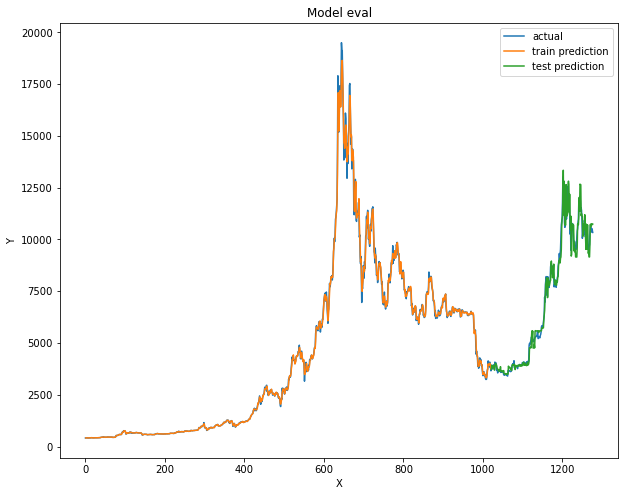

In [151]:
plot_pred_train_test(predict_Train,predict)

# XGBoost

In [51]:
from sklearn import datasets, ensemble


# Bitcoin feature

In [155]:
xgb_reg = ensemble.GradientBoostingRegressor().fit(X_train.loc[:,["Volume" ,"Close"]], y_train)
predict_Train = xgb_reg.predict(X_train.loc[:,["Volume" ,"Close"]])
predict_Test = xgb_reg.predict(X_test.loc[:,["Volume" ,"Close"]])

In [156]:
parameters = {'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
                  'max_depth'    : np.linspace(1, 32, 32, endpoint=True).astype("int32"),
                  'max_features' : list(range(1,X_train.shape[1]))
                 }

In [157]:
GBR = ensemble.GradientBoostingRegressor()

In [158]:
from sklearn.model_selection import GridSearchCV


In [159]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'max_features': [1, 2, 3],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [160]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=1, max_depth=15, max_features=1,
                          n_estimators=8, subsample=0.5)

 The best score across ALL searched params:
 -0.9126550965227994

 The best parameters across ALL searched params:
 {'learning_rate': 1, 'max_depth': 15, 'max_features': 1, 'n_estimators': 8, 'subsample': 0.5}


In [167]:
xgb_reg = ensemble.GradientBoostingRegressor( random_state=42).fit(X_train.loc[:,["Volume" ,"Close"]], y_train)
predict_Train = xgb_reg.predict(X_train.loc[:,["Volume" ,"Close"]])
predict_Test = xgb_reg.predict(X_test.loc[:,["Volume" ,"Close"]])

In [168]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict_Test)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict_Test)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict_Test))}")
print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict_Test))

print("----------------")
print("Final Test")
print("----------------")

# predict_FinalTest = reg.predict(Validate_Data.loc[:,[ "Close","Volume", "Sentiment_Score_-1" ,"Sentiment_Score_0" ,"Sentiment_Score_1"]])
# print(predict_FinalTest)

# mean_squared_error Test : 71074.07483876638
# mean_absolute_error Test : 171.86702685322024
# ----------------
# mean_squared_error Train : 95214.60999436714
# mean_absolute_error Train : 181.64027117823343
# ----------------
# Root_mean_squared_error Train : 308.5686471344215
# Root_mean_absolute_error Test : 266.59721461179294
# ----------------
# Train R2 score: 0.9873692211575351
# Test R2 score: 0.9168572406885547
# ----------------
# Final Test
# ----------------

mean_squared_error Test : 474237.91434209264
mean_absolute_error Test : 449.9707843336657
----------------
mean_squared_error Train : 35382.510961836284
mean_absolute_error Train : 105.84434255101131
----------------
Root_mean_squared_error Train : 188.10239488596704
Root_mean_absolute_error Test : 688.6493406241617
----------------
Train R2 score: 0.9977621157287687
Test R2 score: 0.9478305627096556
----------------
Final Test
----------------


# Both Bitcoin and Sneitment

In [ ]:
xgb_reg = ensemble.GradientBoostingRegressor().fit(X_train, y_train)
predict_Train = xgb_reg.predict(X_train)
predict_Test = xgb_reg.predict(X_test)

In [ ]:
parameters = {'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [1, 2, 4, 8, 16, 32, 64, 100, 200],
                  'max_depth'    : np.linspace(1, 32, 32, endpoint=True).astype("int32"),
                  'max_features' : list(range(1,X_train.shape[1]))
                 }

In [ ]:
GBR = ensemble.GradientBoostingRegressor()

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
                         'max_features': [1, 2, 3],
                         'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=1, max_depth=8, max_features=3,
                          n_estimators=32, subsample=0.5)

 The best score across ALL searched params:
 -1.2598524049734454

 The best parameters across ALL searched params:
 {'learning_rate': 1, 'max_depth': 8, 'max_features': 3, 'n_estimators': 32, 'subsample': 0.5}


In [ ]:
xgb_reg = ensemble.GradientBoostingRegressor( random_state=42).fit(X_train, y_train)
predict_Train = xgb_reg.predict(X_train)
predict_Test = xgb_reg.predict(X_test)

In [ ]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict_Test)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict_Test)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
#mean_squared_error : 157020.94669562386
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict_Test))}")
print("----------------")

print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict_Test))

print("----------------")
print("Final Test")
print("----------------")

# predict_FinalTest = reg.predict(Validate_Data.loc[:,[ "Close","Volume", "Sentiment_Score_-1" ,"Sentiment_Score_0" ,"Sentiment_Score_1"]])
# print(predict_FinalTest)

# mean_squared_error Test : 71074.07483876638
# mean_absolute_error Test : 171.86702685322024
# ----------------
# mean_squared_error Train : 95214.60999436714
# mean_absolute_error Train : 181.64027117823343
# ----------------
# Root_mean_squared_error Train : 308.5686471344215
# Root_mean_absolute_error Test : 266.59721461179294
# ----------------
# Train R2 score: 0.9873692211575351
# Test R2 score: 0.9168572406885547
# ----------------
# Final Test
# ----------------

mean_squared_error Test : 351862.8222658157
mean_absolute_error Test : 400.508812972667
----------------
mean_squared_error Train : 34881.43326592049
mean_absolute_error Train : 103.89835314976312
----------------
Root_mean_squared_error Train : 186.76571758735727
Root_mean_absolute_error Test : 593.1802611903195
----------------
Train R2 score: 0.9977938080497452
Test R2 score: 0.9612926657994735
----------------
Final Test
----------------


# LSTM just Bitcoin

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [66]:
tf.random.set_seed(0)


In [117]:
def create_dataset(dataset, look_back=1, target = -1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), :]
		dataX.append(a)
		dataY.append(dataset[i + look_back, target])
	return np.array(dataX), np.array(dataY)

#df = dataFrame[["High","Low","Open","Volume","Marketcap","Close"]]

In [152]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 22 12:59:47 2022
@author: river
"""

'''import pandas as pd
directory = "D:\\DEBI\\Uottawa\\Fundamentals-Applied DS\\project\\"
train_data  = pd.read_csv(directory+"X.csv")
target_data = pd.read_csv(directory+"Y.csv")
import datetime
# 2014-09-17   2019-11-24
target_data['6'] = target_data['6'].apply(lambda d: datetime.datetime.strptime(d, '%Y-%m-%d'))
import matplotlib.pyplot as plt
plt.plot(target_data['6'],target_data['4'],label = "Close")
# conver date string to Date object
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
fig = plt.figure()
 
fig.set_figheight(8)
fig.set_figwidth(15)
# fix random seed for reproducibility

tf.random.set_seed(0)

import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

directory = "Final_Data9.csv"
dataFrame  = pd.read_csv(directory)
dataFrame.drop('Unnamed: 0', axis=1, inplace=True)
print(dataFrame['timestamp'].unique())
# conver date string to Date object

import datetime
#import matplotlib.dates
dataFrame['timestamp'] = pd.to_datetime(dataFrame['timestamp']).dt.date

# convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1, target = -1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), :]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, target])
# 	return np.array(dataX), np.array(dataY)

#df = dataFrame[["High","Low","Open","Volume","Marketcap","Close"]] Sentiment_Score_-1,Sentiment_Score_0,Sentiment_Score_1,Count
dataset = dataFrame[["Volume" ,"Close"]].values
# dataset = dataFrame[["Volume" ,"Sentiment_Score_-1" ,"Sentiment_Score_0","Sentiment_Score_1","Count","Close"]].values
dataset = dataset.astype('float32')

# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset= scaler.fit_transform(dataset)
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

y_t = y_scaler.fit_transform(dataset[:,-1].reshape(-1, 1))
dataset= X_scaler.fit_transform(dataset)

look_back = 1
X_lstm = dataset[:-look_back, :]
y_lstm = dataset[look_back:, -1]
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

#trainX, testX ,trainY, testY = train[0:train_size,:], train[train_size:,:], test[0:train_size,:], test[train_size:,:]

# reshape input to be [samples, time steps, features]
print(trainX.shape[1])
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
'''
X_lstm = df.iloc[:-1, :].values
y_lstm = df.iloc[1:, -1].values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_transformed = scaler.fit_transform(X_lstm.reshape(-1, 2))
target_transformed = scaler.fit_transform(y_lstm.reshape(-1, 1))
# split into train and test sets
train_size = int(len(train_transformed) * 0.80)
test_size = len(train_transformed) - train_size
X_train, X_test ,y_train, y_test = train_transformed[0:train_size,:], train_transformed[train_size:,:], target_transformed[0:train_size,:], target_transformed[train_size:,:]
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
'''
# create and fit the LSTM network

# model = Sequential()
# model.add(LSTM(500, input_shape=(look_back, trainX.shape[2])))
# model.add(Dropout(0.2))


# model.add(Dense(1))
# model.add(Activation('ReLU'))

# model.compile(loss='mae', optimizer='adam',metrics =["accuracy"])
# model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=2)

#Beast
# model = Sequential()
# model.add(LSTM(250, input_shape=(look_back, trainX.shape[2])))


# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam',metrics =["accuracy"])
# model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# model = Sequential()
# model.add(LSTM(16,return_sequences=True, input_shape=(look_back, trainX.shape[2])))
# model.add(Dropout(0.4))
# model.add(LSTM(8,return_sequences=False))
# model.add(Dropout(0.4))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=20, batch_size=1)


model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(256 ,activation="linear",return_sequences=True, input_shape=(look_back, trainX.shape[2]))))
model.add(Dropout(0.1))


model.add(Bidirectional(LSTM(128, activation="linear",return_sequences=False)))
model.add(Dropout(0.1))



model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2)


# model = Sequential()
# Adding a Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(look_back, trainX.shape[2]))))
# model.add(Bidirectional(LSTM(20, dropout=0.5)))

# model.add(Dense(1))
# model.compile(loss='mse', optimizer='rmsprop')
# model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform(trainY.reshape(-1, 1))


testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform(testY.reshape(-1, 1))


['2016-03-12' '2016-03-13' '2016-03-14' ... '2019-09-07' '2019-09-08'
 '2019-09-09']
2
Epoch 1/100
16/16 - 7s - loss: 0.0380 - 7s/epoch - 430ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0094 - 443ms/epoch - 28ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0015 - 329ms/epoch - 21ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0010 - 379ms/epoch - 24ms/step
Epoch 5/100
16/16 - 0s - loss: 7.3984e-04 - 309ms/epoch - 19ms/step
Epoch 6/100
16/16 - 0s - loss: 6.3506e-04 - 308ms/epoch - 19ms/step
Epoch 7/100
16/16 - 0s - loss: 5.1961e-04 - 308ms/epoch - 19ms/step
Epoch 8/100
16/16 - 0s - loss: 5.3901e-04 - 293ms/epoch - 18ms/step
Epoch 9/100
16/16 - 0s - loss: 5.0228e-04 - 424ms/epoch - 26ms/step
Epoch 10/100
16/16 - 0s - loss: 4.2671e-04 - 270ms/epoch - 17ms/step
Epoch 11/100
16/16 - 0s - loss: 4.0386e-04 - 278ms/epoch - 17ms/step
Epoch 12/100
16/16 - 0s - loss: 4.2495e-04 - 289ms/epoch - 18ms/step
Epoch 13/100
16/16 - 0s - loss: 4.5283e-04 - 304ms/epoch - 19ms/step
Epoch 14/100
16/16 - 0s - loss: 3.9405e-04 

<Figure size 1080x576 with 0 Axes>

In [153]:
# calculate root mean squared error
print("LSTM with Sentiment features")
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))


print(f"mean_squared_error Test : {mean_squared_error(testY, testPredict)}")


predict_Train =trainPredict
predict = testPredict

print("----------------")
print("Train R2 score:", r2_score(trainY, predict_Train))
print("Test R2 score:", r2_score(testY, predict))

LSTM with Sentiment features
Train Score: 339.34 RMSE
Test Score: 339.48 RMSE
mean_squared_error Test : 115244.375
----------------
Train R2 score: 0.9927167666785071
Test R2 score: 0.9873223245890247


In [120]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":testY.reshape(-1), "predict":predict.reshape(-1) })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

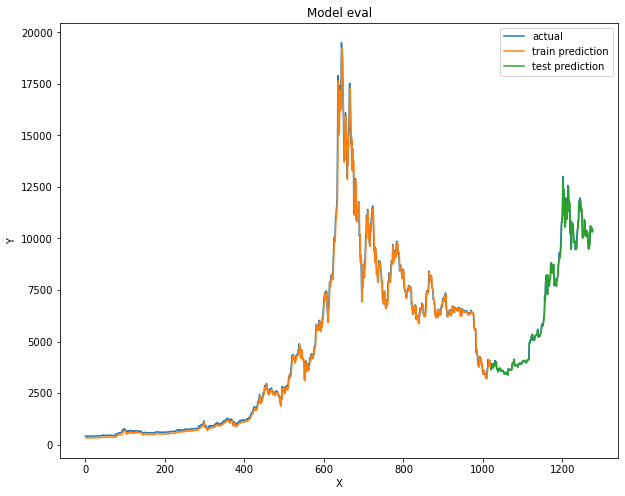

In [121]:
plot_pred_train_test(predict_Train.reshape(-1),predict.reshape(-1))

# For Both Sentiment and Bitcoin


In [163]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jul 22 12:59:47 2022
@author: river
"""

'''import pandas as pd
directory = "D:\\DEBI\\Uottawa\\Fundamentals-Applied DS\\project\\"
train_data  = pd.read_csv(directory+"X.csv")
target_data = pd.read_csv(directory+"Y.csv")
import datetime
# 2014-09-17   2019-11-24
target_data['6'] = target_data['6'].apply(lambda d: datetime.datetime.strptime(d, '%Y-%m-%d'))
import matplotlib.pyplot as plt
plt.plot(target_data['6'],target_data['4'],label = "Close")
# conver date string to Date object
'''
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import Activation


from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
fig = plt.figure()
 
fig.set_figheight(8)
fig.set_figwidth(15)
# fix random seed for reproducibility

tf.random.set_seed(0)

import pandas as pd
import seaborn as sb
import numpy as np

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

directory = "Final_Data9.csv"
dataFrame  = pd.read_csv(directory)
dataFrame.drop('Unnamed: 0', axis=1, inplace=True)
print(dataFrame['timestamp'].unique())
# conver date string to Date object

import datetime
#import matplotlib.dates
dataFrame['timestamp'] = pd.to_datetime(dataFrame['timestamp']).dt.date

# convert an array of values into a dataset matrix
# def create_dataset(dataset, look_back=1, target = -1):
# 	dataX, dataY = [], []
# 	for i in range(len(dataset)-look_back-1):
# 		a = dataset[i:(i+look_back), :]
# 		dataX.append(a)
# 		dataY.append(dataset[i + look_back, target])
# 	return np.array(dataX), np.array(dataY)

#df = dataFrame[["High","Low","Open","Volume","Marketcap","Close"]] Sentiment_Score_-1,Sentiment_Score_0,Sentiment_Score_1,Count
dataset = dataFrame[["Volume" ,"mean" ,"count", "Close"]].values
# dataset = dataFrame[["Volume" ,"Sentiment_Score_-1" ,"Sentiment_Score_0","Sentiment_Score_1","Count","Close"]].values
dataset = dataset.astype('float32')

# normalize the dataset
#scaler = MinMaxScaler(feature_range=(0, 1))
#dataset= scaler.fit_transform(dataset)
X_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))

y_t = y_scaler.fit_transform(dataset[:,-1].reshape(-1, 1))
dataset= X_scaler.fit_transform(dataset)

look_back = 1
X_lstm = dataset[:-look_back, :]
y_lstm = dataset[look_back:, -1]
#train_size = int(len(dataset) * 0.80)
#test_size = len(dataset) - train_size
#train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1

#trainX, trainY = create_dataset(train, look_back)
#testX, testY = create_dataset(test, look_back)
from sklearn.model_selection import train_test_split

trainX, testX, trainY, testY = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

#trainX, testX ,trainY, testY = train[0:train_size,:], train[train_size:,:], test[0:train_size,:], test[train_size:,:]

# reshape input to be [samples, time steps, features]
print(trainX.shape[1])
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))
'''
X_lstm = df.iloc[:-1, :].values
y_lstm = df.iloc[1:, -1].values
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
train_transformed = scaler.fit_transform(X_lstm.reshape(-1, 2))
target_transformed = scaler.fit_transform(y_lstm.reshape(-1, 1))
# split into train and test sets
train_size = int(len(train_transformed) * 0.80)
test_size = len(train_transformed) - train_size
X_train, X_test ,y_train, y_test = train_transformed[0:train_size,:], train_transformed[train_size:,:], target_transformed[0:train_size,:], target_transformed[train_size:,:]
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))
'''
# create and fit the LSTM network

# model = Sequential()
# model.add(LSTM(500, input_shape=(look_back, trainX.shape[2])))
# model.add(Dropout(0.2))


# model.add(Dense(1))
# model.add(Activation('ReLU'))

# model.compile(loss='mae', optimizer='adam',metrics =["accuracy"])
# model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=2)

#Beast
# model = Sequential()
# model.add(LSTM(250, input_shape=(look_back, trainX.shape[2])))


# model.add(Dense(1))
# model.compile(loss='mae', optimizer='adam',metrics =["accuracy"])
# model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)

# model = Sequential()
# model.add(LSTM(16,return_sequences=True, input_shape=(look_back, trainX.shape[2])))
# model.add(Dropout(0.4))
# model.add(LSTM(8,return_sequences=False))
# model.add(Dropout(0.4))
# model.add(Dense(1))
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(trainX, trainY, epochs=20, batch_size=1)


model = Sequential()
# Adding a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(256 ,activation="linear",return_sequences=True, input_shape=(look_back, trainX.shape[2]))))
model.add(Dropout(0.1))


model.add(Bidirectional(LSTM(128, activation="linear",return_sequences=False)))
model.add(Dropout(0.1))



model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=64, verbose=2)


# model = Sequential()
# Adding a Bidirectional LSTM layer
# model.add(Bidirectional(LSTM(64,return_sequences=True, dropout=0.5, input_shape=(look_back, trainX.shape[2]))))
# model.add(Bidirectional(LSTM(20, dropout=0.5)))

# model.add(Dense(1))
# model.compile(loss='mse', optimizer='rmsprop')
# model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)


# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = y_scaler.inverse_transform(trainPredict)
trainY = y_scaler.inverse_transform(trainY.reshape(-1, 1))


testPredict = y_scaler.inverse_transform(testPredict)
testY = y_scaler.inverse_transform(testY.reshape(-1, 1))


['2016-03-12' '2016-03-13' '2016-03-14' ... '2019-09-07' '2019-09-08'
 '2019-09-09']
4
Epoch 1/100
16/16 - 4s - loss: 0.0391 - 4s/epoch - 264ms/step
Epoch 2/100
16/16 - 0s - loss: 0.0124 - 372ms/epoch - 23ms/step
Epoch 3/100
16/16 - 0s - loss: 0.0016 - 304ms/epoch - 19ms/step
Epoch 4/100
16/16 - 0s - loss: 0.0012 - 258ms/epoch - 16ms/step
Epoch 5/100
16/16 - 0s - loss: 8.4603e-04 - 342ms/epoch - 21ms/step
Epoch 6/100
16/16 - 0s - loss: 7.3873e-04 - 440ms/epoch - 28ms/step
Epoch 7/100
16/16 - 0s - loss: 6.1533e-04 - 343ms/epoch - 21ms/step
Epoch 8/100
16/16 - 0s - loss: 6.4801e-04 - 386ms/epoch - 24ms/step
Epoch 9/100
16/16 - 0s - loss: 5.9945e-04 - 320ms/epoch - 20ms/step
Epoch 10/100
16/16 - 0s - loss: 5.3554e-04 - 405ms/epoch - 25ms/step
Epoch 11/100
16/16 - 0s - loss: 4.9724e-04 - 384ms/epoch - 24ms/step
Epoch 12/100
16/16 - 0s - loss: 5.2971e-04 - 405ms/epoch - 25ms/step
Epoch 13/100
16/16 - 0s - loss: 5.0419e-04 - 363ms/epoch - 23ms/step
Epoch 14/100
16/16 - 0s - loss: 4.7342e-04 

<Figure size 1080x576 with 0 Axes>

In [164]:
# calculate root mean squared error
print("LSTM with Sentiment features")
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

print(f"mean_squared_error Test : {mean_squared_error(testY, testPredict)}")

predict_Train =trainPredict
predict = testPredict

print("----------------")
print("Train R2 score:", r2_score(trainY, predict_Train))
print("Test R2 score:", r2_score(testY, predict))

LSTM with Sentiment features
Train Score: 358.32 RMSE
Test Score: 361.30 RMSE
mean_squared_error Test : 130535.40625
----------------
Train R2 score: 0.9918791674125743
Test R2 score: 0.9856402064865378


In [124]:
# plot Prices
df = pd.DataFrame( data = {  "Date": X_test.index , "actual":testY.reshape(-1), "predict":predict.reshape(-1) })
fig = px.line(df, x=X_test.index, y=['actual','predict'], title='Actual Vs Predicted')
fig.show()

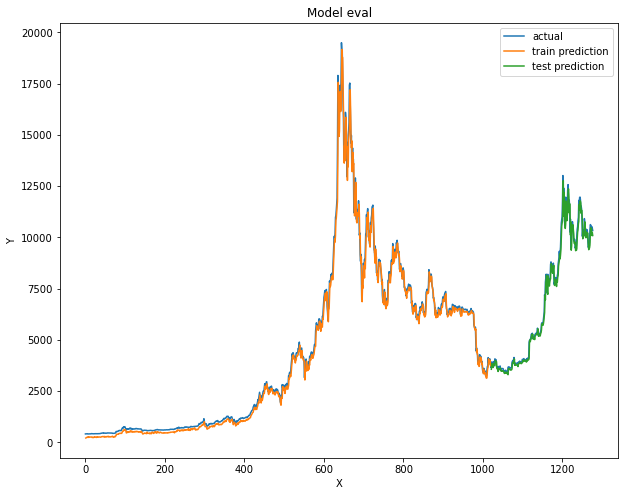

In [125]:
plot_pred_train_test(predict_Train.reshape(-1),predict.reshape(-1))

In [508]:
1 - (1-r2_score(testY, predict))*(len(testY)-1)/(len(testY)-testX.shape[1]-1)


0.9858496871585993

In [ ]:
xgb_reg = ensemble.GradientBoostingRegressor().fit(X_train, y_train)
predict_Train = xgb_reg.predict(X_train)
predict_Test = xgb_reg.predict(X_test)

# Auto Sklearn

This code is not workin on windows 
we run it in colab

In [213]:
# install
# !apt-get install build-essential swig
# !pip install auto-sklearn==0.14.6 

## Train on only Bitcoin Data

In [ ]:
import autosklearn.regression


In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_regression_example_tmp",
)
automl.fit(X_train.loc[:,[ "Close","Volume"]], y_train, dataset_name="Test")

In [ ]:
print(automl.leaderboard())

In [ ]:
predict = automl.predict(X_test.loc[:,[  "Close","Volume"]])
predict_Train = automl.predict(X_train.loc[:,[ "Close","Volume"]])

In [ ]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")

print("----------------")
print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))



## Train on the both Bitcoin Data and sentiment score

In [ ]:
import autosklearn.regression


In [ ]:
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder="/tmp/autosklearn_regression_example_tmp",
)
automl.fit(X_train.loc[:,["Close","Volume", "Sentiment_Score" ,"neg",	"neu",	"pos"]], y_train, dataset_name="Test")

In [ ]:
print(automl.leaderboard())

In [ ]:
predict = automl.predict(X_test.loc[:,[  "Close","Volume", "Sentiment_Score" ,"neg",	"neu",	"pos"]])
predict_Train = automl.predict(X_train.loc[:,[ "Close","Volume", "Sentiment_Score" ,"neg",	"neu",	"pos"]])

In [ ]:
print(f"mean_squared_error Test : {mean_squared_error(y_test, predict)}")
print(f"mean_absolute_error Test : {mean_absolute_error(y_test, predict)}")

print("----------------")

print(f"mean_squared_error Train : {mean_squared_error(y_train, predict_Train)}")
print(f"mean_absolute_error Train : {mean_absolute_error(y_train, predict_Train)}")

print("----------------")

print(f"Root_mean_squared_error Train : {np.sqrt( mean_squared_error(y_train, predict_Train))}")
print(f"Root_mean_absolute_error Test : {np.sqrt(mean_squared_error(y_test, predict))}")

print("----------------")
print("Train R2 score:", r2_score(y_train, predict_Train))
print("Test R2 score:", r2_score(y_test, predict))



In [192]:
y_test

timestamp
2018-12-27     3923.918701
2018-12-28     3820.408691
2018-12-29     3865.952637
2018-12-30     3742.700439
2018-12-31     3843.520020
                  ...     
2019-09-04    10575.533203
2019-09-05    10353.302734
2019-09-06    10517.254883
2019-09-07    10441.276367
2019-09-08    10334.974609
Name: Close, Length: 256, dtype: float64